In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# getting functions from helper file
import sim_frbs
import path_help

### Query

wget --http-user=vravi --http-passwd=Oi30KQD --cookies=on --keep-session-cookies --save-cookies=cookie.txt --load-cookies=cookie.txt -O BC03_001_short.csv "http://gavo.mpa-garching.mpg.de/MyMillennium?action=doQuery&SQL= select c.ra, c.dec, c.Rc, c.diskSize, c.ang_dist, g.redshift, g.cosInclination, g.sfr, g.stellarMass, g.diskMass, g.stellarDiskRadius from Henriques2015a.cones.MRscPlanck1_BC03_001 c, Henriques2015a..MRscPlanck1 g where g.galaxyId = c.galaxyId and c.Rc < 40 "

## Importing and checking catalog

In [2]:
# Bruzual&Charlot2003 stellar populations 001
cat = pd.read_csv('BC03_001_short.csv', skiprows=17, skipfooter=1, engine='python')

In [3]:
# making the central ra to 1
cat.loc[cat[cat['ra']<2].index, 'ra'] += 1
cat.loc[cat[cat['ra']>350].index, 'ra'] -= 359
# adjusting stellar mass units
cat.stellarMass = cat.stellarMass / 10**10 * 69
cat

,ra,dec,Rc,diskSize,ang_dist,redshift,cosInclination,sfr,stellarMass,diskMass,stellarDiskRadius
0,0.686830,0.436129,29.433617,0.461145,1533.3778,3.646797,0.489321,0.117484,4.535739e-11,0.006574,0.002307
1,0.686220,0.435376,26.650368,0.413537,1533.3640,3.646797,0.643715,1.047985,1.072709e-10,0.015547,0.002069
2,0.697360,0.440021,28.600830,0.195316,1533.3192,3.646797,0.599466,0.131863,4.578110e-11,0.006635,0.000977
3,0.694000,0.440541,30.683268,0.175325,1533.3457,3.646797,0.243458,0.065588,1.760312e-10,0.025512,0.000877
4,1.839273,0.241703,30.476948,0.145336,946.6020,8.934729,0.564332,0.919555,1.438145e-11,0.002084,0.000449
...,...,...,...,...,...,...,...,...,...,...,...
7761424,0.253360,0.543110,31.005531,0.186463,1565.7194,3.365268,0.336113,0.040014,3.527287e-11,0.005112,0.000953
7761425,0.353420,0.584233,28.013714,0.171562,1564.5088,3.365268,0.441289,0.178660,7.915548e-12,0.001147,0.000876
7761426,0.300700,0.556513,29.661968,0.417960,1549.1901,3.365268,0.634306,0.017076,7.565313e-13,0.000110,0.002113
7761427,0.311700,0.541111,30.246523,0.696012,1547.2797,3.365268,0.716146,0.007856,3.480635e-13,0.000050,0.003514


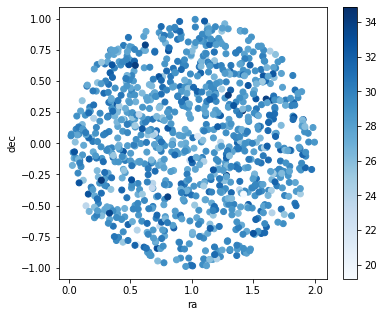

In [4]:
# plotting sample of 1000 galaxies and their magnitudes
ra = cat.ra.sample(n=1000, random_state=122).values
dec = cat.dec.sample(n=1000, random_state=122).values
plt.figure(figsize=(6, 5))
plt.scatter(ra, dec, c=cat.Rc.sample(n=1000, random_state=122))
plt.set_cmap(plt.cm.Blues)
plt.colorbar()
plt.xlabel('ra')
plt.ylabel('dec');
#plt.scatter(frbs.ra, frbs.dec, c='tab:orange', s=5);

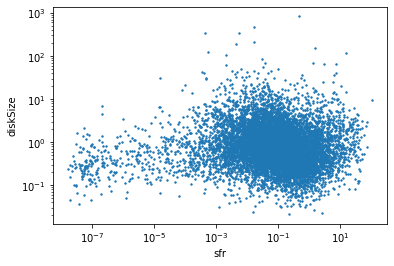

In [5]:
# x vs y plot for different catalog variables
xarr = 'sfr'
yarr = 'diskSize'
x = cat[xarr].sample(n=10000, random_state=122).values
y = cat[yarr].sample(n=10000, random_state=122).values
plt.scatter(x, y*(1+y)**2, s=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(xarr)
plt.ylabel(yarr);

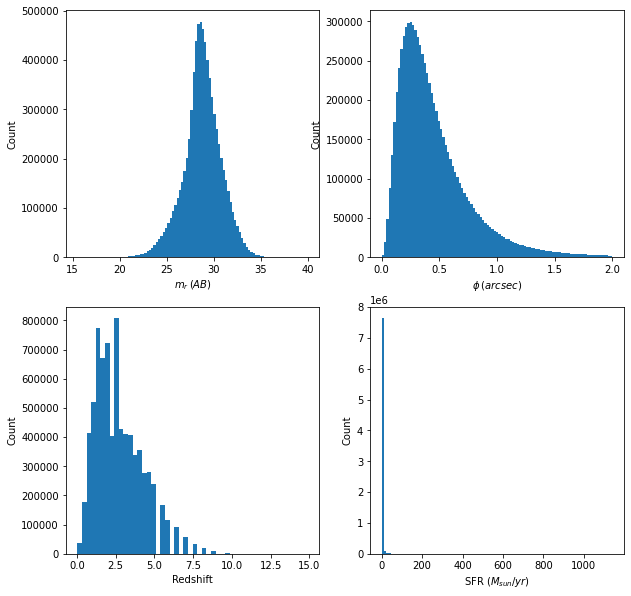

In [6]:
# plotting histograms for different catalog variables
plt.subplots(2, 2, figsize=(10, 10))
plt.subplot(2,2,1)
plt.hist(cat.Rc, 100)
plt.xlabel('$m_r\:(AB)$')
plt.ylabel('Count')

plt.subplot(2,2,2)
plt.hist(cat.diskSize, np.linspace(0, 2, 100))
plt.xlabel('$\phi\:(arcsec)$')
plt.ylabel('Count')

plt.subplot(2,2,3)
plt.hist(cat.redshift, 50)
plt.xlabel('Redshift')
plt.ylabel('Count')

plt.subplot(2,2,4)
plt.hist(cat.sfr, 100)#, np.linspace(0, 2, 100))
plt.xlabel('SFR ($M_{sun}/yr$)')
plt.ylabel('Count');

## Simulating FRBs

In [7]:
%%time
# can set conditions on catalog to search through here
#galaxies = cat[np.logical_and(cat.Rc < 23, cat.Rc>20)]

frbs = sim_frbs.sim_frbs(cat, 1000, 1, ('sfr'), (5., None))
frb_gals = cat.loc[frbs.gal_Index.values]
frbs

CPU times: user 11 s, sys: 42.4 ms, total: 11 s
Wall time: 11.1 s


,ra,dec,radius,dm_host,dm_igm,dm,path_length,n_max,tau_host,tau,gal_Index
0,1.637318,-0.607286,1,485.096758,6132.501202,6330.665439,1100.0,2.511975,6.619405e-01,0.661948,6192820
1,0.765512,0.349757,1,298.201885,13150.061762,13279.495284,1200.0,1.183710,2.712713e-02,0.027134,2187817
2,1.652944,0.717118,1,933.495741,7616.225299,7910.071436,1700.0,4.410686,8.592358e+00,8.592365,7440593
3,0.685540,0.473195,1,68.788614,1360.233874,1470.861730,1300.0,0.351496,1.223748e-03,0.001231,922046
4,1.481346,-0.451346,1,47.739418,3784.265979,3883.502338,9900.0,0.043439,2.162669e-04,0.000223,5709188
...,...,...,...,...,...,...,...,...,...,...,...
995,1.827854,-0.206213,1,565.069036,14157.563790,14331.236412,400.0,5.173980,3.958010e-01,0.395808,3267141
996,1.384772,0.909054,1,692.091616,6314.570445,6543.509944,2600.0,1.817843,2.028194e+00,2.028201,402291
997,1.585634,0.480634,1,105.675704,2938.016352,3054.378305,2300.0,0.369602,3.233893e-03,0.003241,4076907
998,1.262856,-0.213017,1,6.817313,9474.006939,9555.474038,1200.0,0.036111,9.153647e-08,0.000007,397270


## Running PATH + analysis

In [249]:
%%time
stats = path_help.multiple_path(frbs, (0.0, 'sfr'), (6., 'exp'), search_rad=7, gal_cat=cat, save=None)
stats

500 1000 CPU times: user 6min 6s, sys: 36.7 ms, total: 6min 6s
Wall time: 6min 6s


,all_pOx,max_pOx,correct,gal_Index,num_cand
0,"[0.06563420539975692, 0.9259202175959751]",0.925920,True,4866265.0,65
1,"[0.018249407506224693, 0.9790267374294193]",0.979027,True,4995411.0,47
2,"[0.017068760443377653, 0.9339670060844658, 0.0...",0.933967,True,2162809.0,45
3,"[0.30051149941416166, 0.06647880259838851, 0.0...",0.544766,True,3465278.0,39
4,"[0.013242682167241573, 0.415680735068716, 0.01...",0.415681,False,2347252.0,39
...,...,...,...,...,...
995,"[0.012913481060919439, 0.9861267090037947]",0.986127,True,5162267.0,47
996,"[0.012274122134491382, 0.06423012526569895, 0....",0.653581,True,2150000.0,40
997,"[0.023519504400721286, 0.9664155521068464]",0.966416,True,1986295.0,48
998,"[0.6313460691404708, 0.19944049775197895, 0.10...",0.631346,True,192759.0,45


f(T+secure): 0.40
TP: 1.00
p<.01: 0.92
percentage correct: 0.88


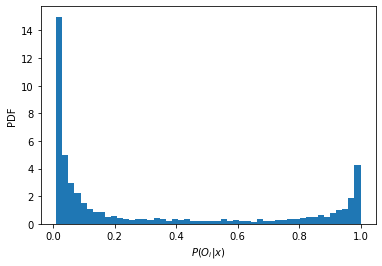

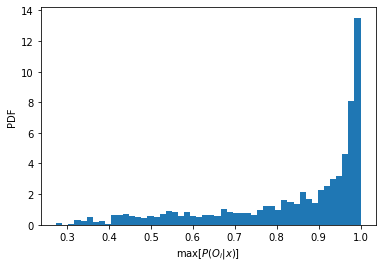

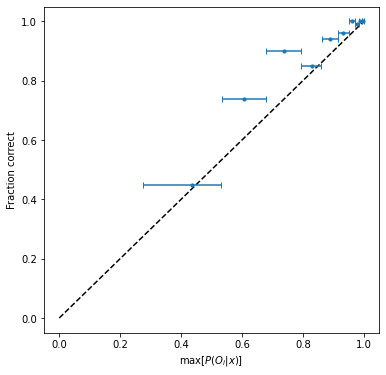

In [250]:
#stats = import_stats('new_dists_10000')
path_help.analyze(stats);

,ra,dec,Rc,diskSize,ang_dist,redshift,cosInclination,sfr,stellarMass,diskMass,stellarDiskRadius,pOx
2178476,0.96722,-0.701961,21.370056,1.478552,1275.8981,0.456079,0.405610,17.76350,2.869871e-08,4.159234,0.006155,0.065634
4866265,0.96783,-0.701500,25.485880,0.661315,1778.0565,1.906216,0.066782,39.46439,1.640938e-08,2.378171,0.003837,0.925920


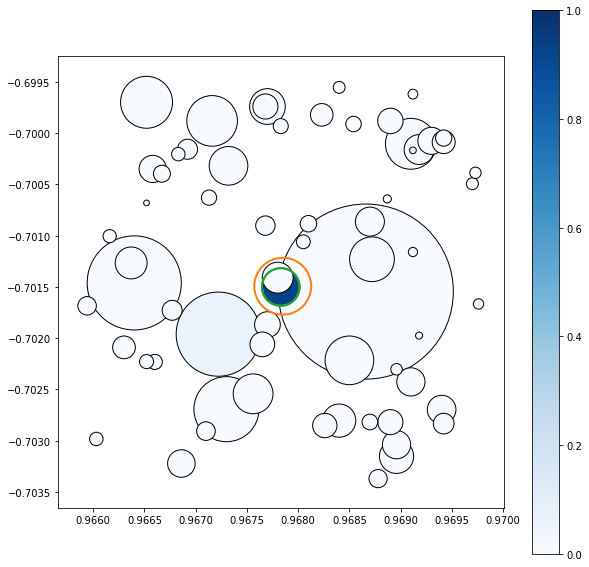

In [252]:
stats = path_help.single_path(frbs.iloc[0], (0., 'sfr'), (6., 'exp'), search_rad=7, plot=True, gal_cat=cat)